In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

from sklearn import metrics
import statsmodels.api as sm
import numpy as np

In [2]:
org_data = pd.read_excel(r'all_mapped_data.xlsx',sheetname='prep_data')

In [3]:
org_data.columns = ['month-year', 'timeStamp', 'Date', 'Omr',
       'Platts', 'Forex', 'intra_volume', 'Freigth', 'inland_sales_ado',
       'inland_sales_HO50', 'ref_pdn_ado', 'ref_prod_H050']

In [240]:
import matplotlib.pyplot as plt
import seaborn as sns

In [241]:
org_data.set_index('timeStamp',inplace = True)

In [244]:
plt.style.use('seaborn-white')
plt.rcParams["figure.figsize"] = [16,9]

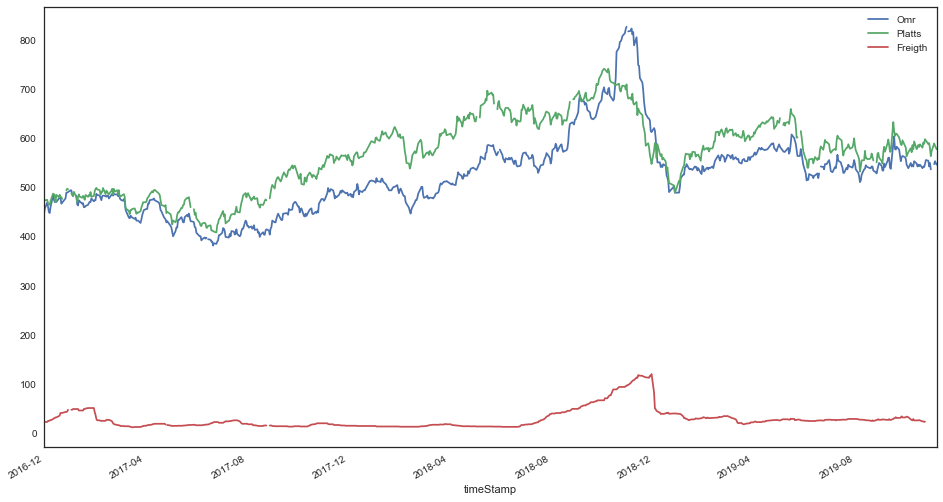

In [245]:
org_data[['Omr','Platts', 'Freigth']].plot()
plt.show()

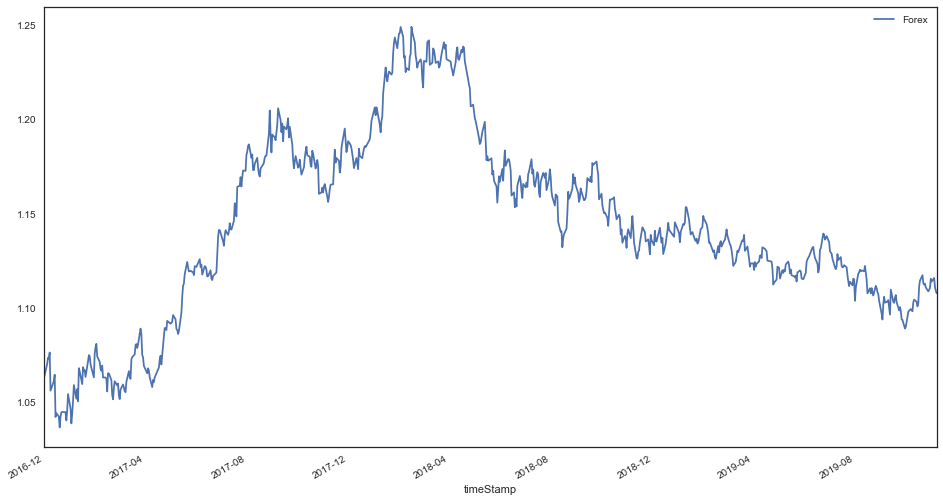

In [246]:
org_data[['Forex']].plot()
plt.show()

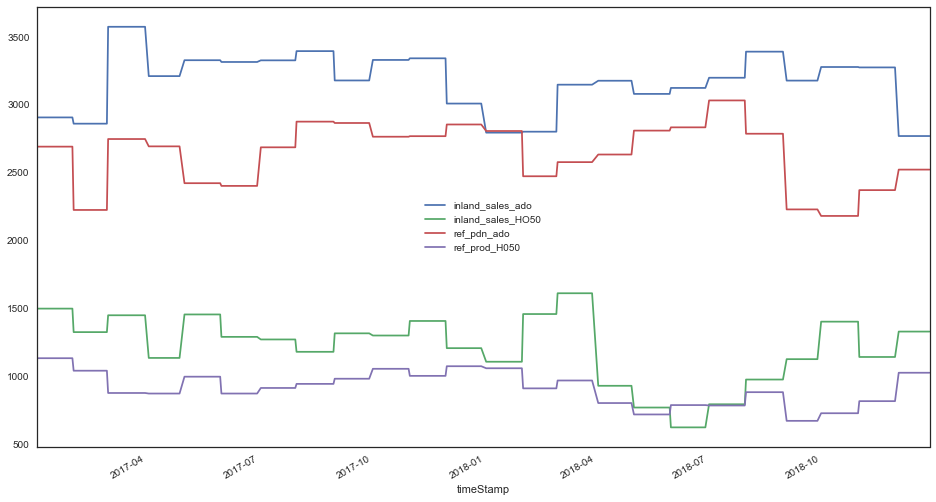

In [248]:
org_data[['inland_sales_ado',
       'inland_sales_HO50', 'ref_pdn_ado', 'ref_prod_H050']].dropna().plot()
plt.show()

In [249]:
org_data.describe()

Omr      Platts       Forex  intra_volume     Freigth  \
count  734.000000  730.000000  740.000000    687.000000  727.000000   
mean   522.871390  567.601027    1.142638   1313.320233   28.819739   
std     80.370357   74.931919    0.048327   1970.484934   21.179906   
min    381.400000  408.000000    1.036400      4.000000   11.800000   
25%    470.100000  497.000000    1.115075    245.500000   15.100000   
50%    525.150000  572.750000    1.138700    825.000000   23.500000   
75%    559.800000  620.187500    1.174900   1939.000000   30.675000   
max    826.300000  741.000000    1.249300  40923.000000  120.150000   

       inland_sales_ado  inland_sales_HO50  ref_pdn_ado  ref_prod_H050  
count        503.000000         503.000000   503.000000     503.000000  
mean        3172.775348        1213.236581  2637.741551     913.353877  
std          209.068355         244.923563   228.656279     121.760730  
min         2768.000000         624.000000  2180.000000     672.000000  
25%         3078.000000        1107.000000  2446.500000     817.000000  
50%         3197.000000        1290.000000  2692.000000     911.000000  
75%         3326.000000        1407.000000  2806.500000    1003.000000  
max         3572.000000        1611.000000  3030.000000    1133.000000

In [208]:
data = org_data.copy()

In [210]:
data['Omr'].quantile([0.05,0.95,0.99,1])

0.05    408.180
0.95    676.000
0.99    809.745
1.00    826.300
Name: Omr, dtype: float64

In [211]:
data['Omr'].min()

381.39999999999998

In [212]:
data['Omr'].max()

826.29999999999995

In [213]:
data = data.query('408 <= Omr <= 676')

In [214]:
# stDate = pd.to_datetime("01-09-2018",format="%d-%m-%Y")
# endDate = pd.to_datetime("31-12-2018",format="%d-%m-%Y")
endDate = pd.to_datetime("01-01-2019",format="%d-%m-%Y")

In [215]:
#df = data.iloc[-120:,]
# df.shape
# data = df 

In [216]:
#data2 = data.query('timeStamp >= @endDate | timeStamp <= @stDate')
data = data.query('timeStamp >= @endDate')

In [217]:
data = data.loc[:,['Omr','Platts', 'Forex', 'Freigth']]

In [218]:
data.isnull().sum()

Omr        0
Platts     3
Forex      0
Freigth    9
dtype: int64

In [219]:
data.dropna(inplace=True)

In [220]:
data.isnull().sum()

Omr        0
Platts     0
Forex      0
Freigth    0
dtype: int64

In [221]:
data['Omr_lag1'] = data['Omr'].shift(1)

data['Omr_lag2'] = data['Omr'].shift(2)
data['platts_lag1'] = data['Platts'].shift(1)
data['platts_lag2'] = data['Platts'].shift(2)
data['Freigth_lag1'] = data['Freigth'].shift(1)
data['Freigth_lag2'] = data['Freigth'].shift(2)

data['Forex_lag1'] = data['Forex'].shift(1)
data['Forex_lag2'] = data['Forex'].shift(2)

In [222]:
data.dropna(inplace=True)

In [223]:
data.head()

Omr  Platts   Forex  Freigth  Omr_lag1  Omr_lag2  platts_lag1  \
526  518.6  526.50  1.1403    38.65     500.9     489.1       509.50   
527  525.7  541.75  1.1445    34.10     518.6     500.9       526.50   
528  525.7  544.00  1.1440    30.70     525.7     518.6       541.75   
529  539.9  559.25  1.1455    30.85     525.7     525.7       544.00   
530  541.1  568.25  1.1535    29.40     539.9     525.7       559.25   

     platts_lag2  Freigth_lag1  Freigth_lag2  Forex_lag1  Forex_lag2  
526       513.25         39.15         39.40      1.1348      1.1397  
527       509.50         38.65         39.15      1.1403      1.1348  
528       526.50         34.10         38.65      1.1445      1.1403  
529       541.75         30.70         34.10      1.1440      1.1445  
530       544.00         30.85         30.70      1.1455      1.1440

In [224]:
data.columns

Index(['Omr', 'Platts', 'Forex', 'Freigth', 'Omr_lag1', 'Omr_lag2',
       'platts_lag1', 'platts_lag2', 'Freigth_lag1', 'Freigth_lag2',
       'Forex_lag1', 'Forex_lag2'],
      dtype='object')

In [225]:
data.drop(['Platts', 'Forex', 'Freigth'],inplace=True,axis=1)

In [226]:
data.head()

Omr  Omr_lag1  Omr_lag2  platts_lag1  platts_lag2  Freigth_lag1  \
526  518.6     500.9     489.1       509.50       513.25         39.15   
527  525.7     518.6     500.9       526.50       509.50         38.65   
528  525.7     525.7     518.6       541.75       526.50         34.10   
529  539.9     525.7     525.7       544.00       541.75         30.70   
530  541.1     539.9     525.7       559.25       544.00         30.85   

     Freigth_lag2  Forex_lag1  Forex_lag2  
526         39.40      1.1348      1.1397  
527         39.15      1.1403      1.1348  
528         38.65      1.1445      1.1403  
529         34.10      1.1440      1.1445  
530         30.70      1.1455      1.1440

In [227]:
data['platts_diff'] = data['platts_lag1'] - data['platts_lag2']

In [228]:
data.corr()

Omr  Omr_lag1  Omr_lag2  platts_lag1  platts_lag2  \
Omr           1.000000  0.902507  0.789578     0.891272     0.802730   
Omr_lag1      0.902507  1.000000  0.905910     0.917768     0.895107   
Omr_lag2      0.789578  0.905910  1.000000     0.840460     0.921324   
platts_lag1   0.891272  0.917768  0.840460     1.000000     0.930425   
platts_lag2   0.802730  0.895107  0.921324     0.930425     1.000000   
Freigth_lag1 -0.070806 -0.080330 -0.105079    -0.138670    -0.144464   
Freigth_lag2 -0.106943 -0.111072 -0.129808    -0.164314    -0.176919   
Forex_lag1   -0.124619 -0.168092 -0.211375    -0.000935    -0.044198   
Forex_lag2   -0.120032 -0.139468 -0.185223     0.011183    -0.018341   
platts_diff   0.194767  0.015398 -0.260516     0.138076    -0.234502   

              Freigth_lag1  Freigth_lag2  Forex_lag1  Forex_lag2  platts_diff  
Omr              -0.070806     -0.106943   -0.124619   -0.120032     0.194767  
Omr_lag1         -0.080330     -0.111072   -0.168092   -0.139468     0.015398  
Omr_lag2         -0.105079     -0.129808   -0.211375   -0.185223    -0.260516  
platts_lag1      -0.138670     -0.164314   -0.000935    0.011183     0.138076  
platts_lag2      -0.144464     -0.176919   -0.044198   -0.018341    -0.234502  
Freigth_lag1      1.000000      0.954732    0.026856    0.024130     0.022584  
Freigth_lag2      0.954732      1.000000    0.046006    0.042267     0.042272  
Forex_lag1        0.026856      0.046006    1.000000    0.963778     0.116965  
Forex_lag2        0.024130      0.042267    0.963778    1.000000     0.079230  
platts_diff       0.022584      0.042272    0.116965    0.079230     1.000000

In [229]:
prep_data = data.copy()

In [230]:
Y = prep_data.pop('Omr')

X = prep_data

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                    Omr   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     152.4
Date:                Tue, 12 Nov 2019   Prob (F-statistic):           1.24e-78
Time:                        18:09:49   Log-Likelihood:                -674.09
No. Observations:                 200   AIC:                             1366.
Df Residuals:                     191   BIC:                             1396.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const          145.9496     56.830      2.568   

In [236]:
# Splitting the data into training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20,random_state=100) 

regr = LinearRegression() 
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print(metrics.mean_absolute_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

5.54582951934
6.80661458041


In [238]:
pd.Series(regr.coef_,X.columns)

const           0.000000e+00
Omr_lag1        5.659315e-01
Omr_lag2        6.045627e-02
platts_lag1     4.157097e+12
platts_lag2    -4.157097e+12
Freigth_lag1    8.898561e-01
Freigth_lag2   -7.613987e-01
Forex_lag1      1.806422e+02
Forex_lag2     -2.437052e+02
platts_diff    -4.157097e+12
dtype: float64

In [232]:
X.shape

(200, 10)

In [233]:
from sklearn.ensemble import RandomForestRegressor

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30,random_state=100)

regr = RandomForestRegressor(max_depth=4, random_state=0,
                             n_estimators=300,min_samples_split=10,
                             min_samples_leaf=5)
regr.fit(X_train, y_train) 
y_pred = regr.predict(X_test)

print(metrics.mean_absolute_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

6.81929627473
8.92906658013


In [235]:
X.shape

(200, 10)